<a href="https://colab.research.google.com/github/jnsoliveira/Atividades/blob/main/Trilha4-VisualizacaoDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINKS**

Github - https://github.com/jnsoliveira/Atividades/blob/main/Trilha4-VisualizacaoDeDados.ipynb

GoogleColab - https://colab.research.google.com/github/jnsoliveira/Atividades/blob/main/Trilha4-VisualizacaoDeDados.ipynb

# **VISUALIZAÇÃO DE DADOS PARA TOMADA DE DECISÃO**

**Atividade - Trilha 4**

Para esta atividade, vamos explorar o dataset da Netflix, disponível no Kaggle. Teremos 2 etapas:

1) Análise exploratória de dados

2) Análise de uma série temporal

Para isso, vamos utilizar o Google Colaboratory desenvolvendo um notebook para esta atividade.

Vamos trabalhar, primeiramente com a Análise Exploratória de Dados, conhecendo dataset, número de exemplares e tipos de dados. Registre os resultados no Colab/Notebook. Utilize também uma visualização que julgue aderente a esta análise, como as que vimos na trilha 3, sobre análise exploratória.

Em seguida, vamos desenvolver uma visualização de série temporal para finalizar a atividade.

Sugerimos utilizar o Matplotlib ou o Seaborn para produzir as visualizações em Python. Veja os exemplos nos e-books das trilhas 3 e 4. Se quiserem utilizar o Tableau, Power BI ou afins também são validos, fiquem a vontade  .  

Baixe o arquivo CSV, disponível no link:

https://www.kaggle.com/shivamb/netflix-shows .

Em seguida, abra um notebook novo no Google/Colaboratory https://colab.research.google.com/notebooks/intro.ipynb#recent=true    


Suba o arquivo baixado no Kaggle para desenvolver as etapas de Análise Exploratória e a Série Temporal. (Ele também está anexo abaixo na sessão: Arquivos

Encaminhe o arquivo notebook com o código desenvolvido na tarefa para avaliação.

**IMPORTANDO BIBLIOTECAS**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**IMPORTANDO DA BASE DE DADOS**

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/jnsoliveira/Atividades/main/netflix_titles.csv', sep=',', parse_dates=True)

**ESTRUTURA DA BASE DA DADOS**

In [7]:
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**CAMPOS NULOS E TIPO DE DADOS**

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


**SOMA DOS CAMPOS NULOS POR COLUNA**

In [9]:
print(df.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


**APAGAR AS LINHAS QUE CONTÊM PELO MENOS UM CAMPO NULO E ARMAZENAR EM UM NOVO DATAFRAME**

In [10]:
netflix = df.dropna()
print(netflix.shape)
netflix.head()

(5332, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


**NOVA ESTRUTURA APÓS OS AJUSTES**

In [11]:
print(netflix.isna().sum())
print(netflix.info())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB
None


**LANÇAMENTO DE FILMES E SHOWS DE TV**

Movie      5185
TV Show     147
Name: type, dtype: int64


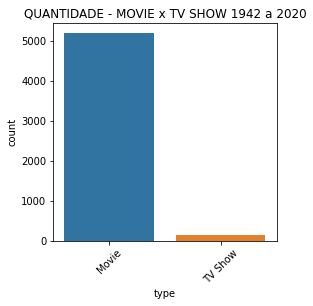

In [12]:
print(netflix.type.value_counts())
plt.figure(figsize=(4,4))
sns.countplot(x=netflix.type)

plt.title('QUANTIDADE - MOVIE x TV SHOW 1942 a 2020')
plt.xticks(rotation=45)
plt.show()

**ANÁLISE TEMPORAL VERIFICANDO A QUANTIDADE DE FILMES DE PROGRAMAS DE TV LANÇADOS**

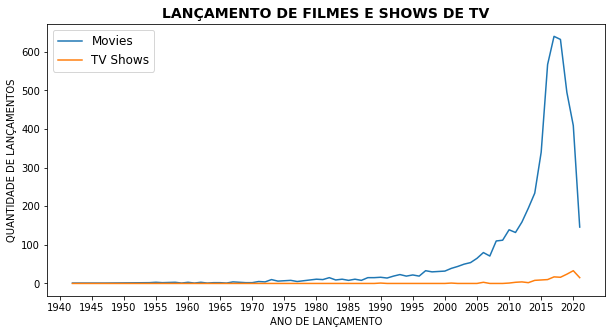

In [14]:
tabela = pd.pivot_table(data=netflix, values='show_id', index='release_year', columns='type', aggfunc='count').reset_index()
tabela.fillna(0, inplace = True)

fig, ax = plt.subplots(figsize=(10,5))
tabela.rename(columns={'TV Show': 'TV_Show'}, inplace = True)

ax.plot(tabela.release_year, tabela.Movie, label='Movies', alpha=1.0)
ax.plot(tabela.release_year, tabela.TV_Show, label='TV Shows', alpha=1.0)
ax.set_title('LANÇAMENTO DE FILMES E SHOWS DE TV', fontsize=14, weight='bold')
ax.set_xlabel("ANO DE LANÇAMENTO")
ax.set_ylabel("QUANTIDADE DE LANÇAMENTOS")
ax.legend(fontsize=12)
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

plt.show()

[]

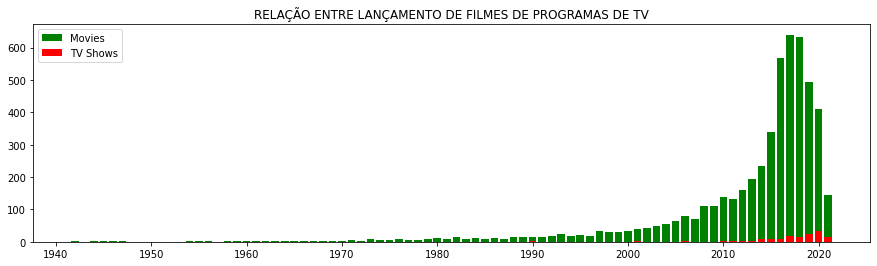

In [15]:
plt.rc('figure', figsize = (15, 4))
area = plt.figure()

g2 = plt.bar(tabela['release_year'], tabela['Movie'], label = 'Movies', color = 'green')
g3 = plt.bar(tabela['release_year'], tabela['TV_Show'], label = 'TV Shows', color = 'red')
plt.title('RELAÇÃO ENTRE LANÇAMENTO DE FILMES DE PROGRAMAS DE TV')
plt.legend()
plt.plot()